In [1]:
import tkinter as tk
from tkinter import ttk

root=tk.Tk()
root.title("pack() 測試")
root.geometry("220x100")

ttk.Button(root, text="南志鉉").pack(side=tk.LEFT)
ttk.Button(root, text="都敬秀").pack(side=tk.LEFT)
ttk.Button(root, text="百日的郎君").pack(side=tk.LEFT)
root.mainloop()

In [7]:
import win32gui
def get_inner_windows(hwnd):
    def callback(hwnd, hwnds):
        if win32gui.IsWindowVisible(hwnd) and win32gui.IsWindowEnabled(hwnd):
            hwnds[win32gui.GetClassName(hwnd)] = hwnd
        return True
    hwnds_dict = dict()
    win32gui.EnumChildWindows(hwnd, callback, hwnds_dict)
    return hwnds_dict

get_inner_windows('')

TypeError: The object is not a PyHANDLE object

In [10]:
win32gui.FindWindow(None, 'BlueStacks App Player')

526456

In [11]:
[0, 0, 0] + [0, 0, 0]

[0, 0, 0, 0, 0, 0]

In [12]:
import win32ui
def takescreen(hwnd,width,height,filename):
    #hwnd is window handle
    #width, height are in pixels
    #filename is name of screenshot file
    
    hwndDC = win32gui.GetWindowDC(hwnd)
    mfcDC  = win32ui.CreateDCFromHandle(hwndDC)
    saveDC = mfcDC.CreateCompatibleDC()
   
    saveBitMap = win32ui.CreateBitmap()
    saveBitMap.CreateCompatibleBitmap(mfcDC, width, height)    
    saveDC.SelectObject(saveBitMap)    
    result = windll.user32.PrintWindow(hwnd, saveDC.GetSafeHdc(), 2)
    bmpinfo = saveBitMap.GetInfo()
    bmpstr = saveBitMap.GetBitmapBits(True)
    im = Image.frombuffer(
        'RGB',
        (bmpinfo['bmWidth'], bmpinfo['bmHeight']),
        bmpstr, 'raw', 'BGRX', 0, 1)
    
    win32gui.DeleteObject(saveBitMap.GetHandle())
    saveDC.DeleteDC()
    mfcDC.DeleteDC()
    win32gui.ReleaseDC(hwnd, hwndDC)

    if result == 1:
        #PrintWindow Succeeded
        im.save(filename)

#sample usage
hwnd = win32gui.FindWindow(None, 'BlueStacks App Player')
takescreen(hwnd,1024,768,'screenshot.png') 

NameError: name 'windll' is not defined

In [42]:
screen.grabWindow(hwnd)

AttributeError: 'NoneType' object has no attribute 'grabWindow'

In [1]:
from PyQt5.QtWidgets import QApplication
import win32gui
import sys
#這個是擷取全螢幕的
hwnd = 1968496
app = QApplication(sys.argv)
screen = QApplication.primaryScreen()
img = screen.grabWindow(hwnd).toImage()
img.save("screenshot.jpg")

True

In [21]:
import numpy as np
import cv2
import win32gui
import win32con
import win32ui

import re
from time import sleep

'''
製作者：JN
參考網址
https://www.codeproject.com/Articles/20651/Capturing-Minimized-Window-A-Kid-s-Trick
https://www.programcreek.com/python/example/62809/win32ui.CreateBitmap
'''


def FindWindow_bySearch(pattern):
    window_list = []
    win32gui.EnumWindows(lambda hWnd, param: param.append(hWnd), window_list)
    for each in window_list:
        if re.search(pattern, win32gui.GetWindowText(each)) is not None:
            return each

def getWindow_W_H(hwnd):
    # 取得目標視窗的大小
    left, top, right, bot = win32gui.GetWindowRect(hwnd)
    width = right - left - 15
    height = bot - top - 11
    return (left, top, width, height)

def getWindow_Img(hwnd):
    # 將 hwnd 換成 WindowLong
    s = win32gui.GetWindowLong(hwnd,win32con.GWL_EXSTYLE)
    win32gui.SetWindowLong(hwnd, win32con.GWL_EXSTYLE, s|win32con.WS_EX_LAYERED)
    # 判斷視窗是否最小化
    show = win32gui.IsIconic(hwnd)
    # 將視窗圖層屬性改變成透明    
    # 還原視窗並拉到最前方
    # 取消最大小化動畫
    # 取得視窗寬高
    if show == 1: 
        win32gui.SystemParametersInfo(win32con.SPI_SETANIMATION, 0)
        win32gui.SetLayeredWindowAttributes(hwnd, 0, 0, win32con.LWA_ALPHA)
        win32gui.ShowWindow(hwnd, win32con.SW_RESTORE)    
        x, y, width, height = getWindow_W_H(hwnd)        
    # 創造輸出圖層
    hwindc = win32gui.GetWindowDC(hwnd)
    srcdc = win32ui.CreateDCFromHandle(hwindc)
    memdc = srcdc.CreateCompatibleDC()
    bmp = win32ui.CreateBitmap()
    # 取得視窗寬高
    x, y, width, height = getWindow_W_H(hwnd)
    # 如果視窗最小化，則移到Z軸最下方
    if show == 1: win32gui.SetWindowPos(hwnd, win32con.HWND_BOTTOM, x, y, width, height, win32con.SWP_NOACTIVATE)
    # 複製目標圖層，貼上到 bmp
    bmp.CreateCompatibleBitmap(srcdc, width, height)
    memdc.SelectObject(bmp)
    memdc.BitBlt((0 , 0), (width, height), srcdc, (8, 3), win32con.SRCCOPY)
    # 將 bitmap 轉換成 np
    signedIntsArray = bmp.GetBitmapBits(True)
    img = np.fromstring(signedIntsArray, dtype='uint8')
    img.shape = (height, width, 4) #png，具有透明度的
    # 釋放device content
    srcdc.DeleteDC()
    memdc.DeleteDC()
    win32gui.ReleaseDC(hwnd, hwindc)
    win32gui.DeleteObject(bmp.GetHandle())
    # 還原目標屬性
    if show == 1 :
        win32gui.SetLayeredWindowAttributes(hwnd, 0, 255, win32con.LWA_ALPHA)
        win32gui.SystemParametersInfo(win32con.SPI_SETANIMATION, 1)
    # 回傳圖片
    return img

hwnd = 526456

while True:
    sleep(0.03)
    frame = getWindow_Img(hwnd)
    cv2.imshow("screen box", frame)
    k = cv2.waitKey(30)&0xFF #64bits! need a mask
    if k ==27:
        cv2.destroyAllWindows()
        break

C:\Users\User\AppData\Local\Temp\ipykernel_6008\2305851936.py:62: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  img = np.fromstring(signedIntsArray, dtype='uint8')


KeyboardInterrupt: 

In [35]:
import win32gui,win32ui,win32con
from ctypes import windll
from PIL import Image
import cv2
import numpy

hWnd = 591804
left,top,right,bot = win32gui.GetWindowRect(hWnd)
width = right - left
height = bot - top

hWndDC = win32gui.GetWindowDC(hWnd)
mfcDC = win32ui.CreateDCFromHandle(hWndDC)
saveDC = mfcDC.CreateCompatibleDC()
saveBitMap = win32ui.CreateBitmap()
saveBitMap.CreateCompatibleBitmap(mfcDC,width,height)
saveDC.SelectObject(saveBitMap)
# saveDC.BitBlt((0,0),(width,height),mfcDC,(0,win32con.SRCCOPY))

saveBitMap.SaveBitmapFile(saveDC,"img_Winapi.bmp")




In [64]:
win32gui.FindWindow(None, '小算盤')

459006

In [43]:
import win32gui
win32gui.FindWindow(None, 'BlueStacks App Player')

3738078

In [37]:
from win32gui import *
ShowWindow(526456, win32con.SW_MAXIMIZE)

24

In [4]:
battleSkill = {'b1c': None, 'b1p1': None, 'b1p2': None, 'b1p3': None, 
                            'b2c': None, 'b2p1': None, 'b2p2': None, 'b2p3': None, 
                            'b3c': 123, 'b3p1': None, 'b3p2': None, 'b3p3': None}
battleSkill

{'b1c': None,
 'b1p1': None,
 'b1p2': None,
 'b1p3': None,
 'b2c': None,
 'b2p1': None,
 'b2p2': None,
 'b2p3': None,
 'b3c': 123,
 'b3p1': None,
 'b3p2': None,
 'b3p3': None}

In [5]:
battleSkill['b3c']

123

In [2]:
type(battleSkill)

dict

In [6]:
func = 'battle1'
player = 'player1'
k = func[0]+func[-1]+player[0]+player[-1]
k

'b1p1'

In [25]:
import time
import win32api, win32con, win32gui

def doClick(x, y):
    hwnd = 68000
    long_position = win32api.MAKELONG(x, y) 
    win32gui.PostMessage(hwnd, win32con.WM_LBUTTONDOWN, win32con.MK_LBUTTON, long_position)
    time.sleep(2)
    win32gui.PostMessage(hwnd, win32con.WM_LBUTTONUP, win32con.MK_LBUTTON, long_position)

doClick(0, 0)
doClick(, 395)

In [38]:
shell.SendKeys('%')
win32gui.SetForegroundWindow(67988)

error: (0, 'SetForegroundWindow', 'No error message is available')

In [74]:
import win32gui, win32ui, win32con, win32api, win32com.client
from time import sleep


VK_KEY_7 = 0x37
VK_KEY_E = 0x45
VK_KEY_A = 0x41



def main():
    window_name = 'BlueStacks App Player'
    hwnd = get_hwnd(window_name)
    shell = win32com.client.Dispatch("WScript.Shell")
    shell.SendKeys('%')
    hwnd = 67988
    win32gui.SetForegroundWindow(hwnd)
    doClick(hwnd, 47, 358)
    doClick(hwnd, 161, 356)
    doClick(hwnd, 252, 364)

    doClick(hwnd, 50, 50)
    doClick(hwnd, 482, 242)
    doClick(hwnd, 606, 240)
    doClick(hwnd, 692, 373)
    doClick(hwnd, 507, 372)
    doClick(hwnd, 581, 369)
    doClick(hwnd, 583, 299)
    doClick(hwnd, 769, 434)





def get_hwnd(window_name):
    hwnd = win32gui.FindWindow(None, window_name)
    print(get_inner_windows(hwnd))
    hwnd = get_inner_windows(hwnd)['Qt5154QWindowIcon']
    return hwnd


def get_inner_windows(whnd1):
    def callback(hwnd, hwnds):
        if win32gui.IsWindowVisible(hwnd) and win32gui.IsWindowEnabled(hwnd):
            hwnds[win32gui.GetClassName(hwnd)] = hwnd
        return True
    hwnds = {}
    win32gui.EnumChildWindows(whnd1, callback, hwnds)
    return hwnds


def press_key(hwnd, key):
    win32gui.PostMessage(hwnd, win32con.WM_KEYDOWN, key, 0)
    sleep(2)


def doClick(hwnd, x, y):
    long_position = win32api.MAKELONG(x, y)
    hWnd1= win32gui.FindWindowEx(67988, None, None, None)
    win32gui.PostMessage(hWnd1, win32con.WM_LBUTTONDOWN, win32con.MK_LBUTTON, long_position)
    time.sleep(1)
    win32gui.PostMessage(hWnd1, win32con.WM_LBUTTONUP, None, long_position)


main()

{'Qt5154QWindowIcon': 68000}


In [81]:
import win32gui, win32api, win32con
import time

def click_pg(name, x, y):
    hwnd = win32gui.FindWindow(None, name) # 265348
    hwnd = win32gui.FindWindowEx(hwnd, None, None, None) # 330930
    click = win32api.MAKELONG(x, y - 40)
    win32gui.SendMessage(hwnd, win32con.WM_LBUTTONDOWN, win32con.MK_LBUTTON, click)
    win32gui.SendMessage(hwnd, win32con.WM_LBUTTONUP, None, click)

name = '小算盤'
numpad = [[50, 340], [150, 340], [250, 340]]

for i in numpad:
    click_pg(name, i[0], i[1])
    time.sleep(1)

In [84]:
hwnd = win32gui.FindWindow(None, 'BlueStacks App Player') # 265348
hwnd = win32gui.FindWindowEx(hwnd, None, None, None) # 330930
click = win32api.MAKELONG(482, 242)
win32gui.SendMessage(hwnd, win32con.WM_LBUTTONDOWN, win32con.MK_LBUTTON, click)
win32gui.SendMessage(hwnd, win32con.WM_LBUTTONUP, None, click)

0

In [95]:
hwnd = win32gui.FindWindow(None, 'BlueStacks App Player') # 67988
hwnd = win32gui.FindWindowEx(hwnd, None, None, None) # 68000
click = win32api.MAKELONG(482, 242)
win32gui.SendMessage(hwnd, win32con.WM_LBUTTONDOWN, win32con.MK_LBUTTON, click)
win32gui.SendMessage(hwnd, win32con.WM_LBUTTONUP, None, click)
sleep(1)
win32gui.SendMessage(hwnd, win32con.WM_LBUTTONDOWN, win32con.MK_LBUTTON, click)
win32gui.SendMessage(hwnd, win32con.WM_LBUTTONUP, None, click)
sleep(1)
win32gui.SendMessage(hwnd, win32con.WM_LBUTTONDOWN, win32con.MK_LBUTTON, click)
win32gui.SendMessage(hwnd, win32con.WM_LBUTTONUP, None, click)
sleep(1)
win32gui.SendMessage(hwnd, win32con.WM_LBUTTONDOWN, win32con.MK_LBUTTON, click)
win32gui.SendMessage(hwnd, win32con.WM_LBUTTONUP, None, click)
sleep(1)
win32gui.SendMessage(hwnd, win32con.WM_LBUTTONDOWN, win32con.MK_LBUTTON, click)
win32gui.SendMessage(hwnd, win32con.WM_LBUTTONUP, None, click)


0

In [ ]:


def doClick(self, x, y):
    hwnd = innerHwnd
    long_position = win32api.MAKELONG(x, y) 
    win32gui.PostMessage(hwnd, win32con.WM_LBUTTONDOWN, win32con.MK_LBUTTON, long_position)
    time.sleep(2)
    win32gui.PostMessage(hwnd, win32con.WM_LBUTTONUP, win32con.MK_LBUTTON, long_position)

In [1]:
p = 1
n = 1

In [3]:
'p'+str(p)+'s'+str(n)

'p1s1'

In [ ]:
import time
import pyautogui
while True:
    img = pyautogui.locateOnScreen('Quick.png', confidence=0.95)
    if img == None:
        break
    img_center = pyautogui.center(img)
    print(img_center)
    time.sleep(1)

In [24]:
import time
import pyautogui
while True:
    img = pyautogui.locateAllOnScreen('Quick.png', confidence=0.8)
    print(list(img))
    if img == None:
        break
    # img_center = pyautogui.center(img)
    # print(img_center)
    time.sleep(1)

[Box(left=1293, top=602, width=119, height=83), Box(left=1294, top=602, width=119, height=83), Box(left=1295, top=602, width=119, height=83), Box(left=1293, top=603, width=119, height=83), Box(left=1294, top=603, width=119, height=83), Box(left=1295, top=603, width=119, height=83), Box(left=1294, top=604, width=119, height=83)]
[Box(left=1294, top=595, width=119, height=83), Box(left=1295, top=595, width=119, height=83), Box(left=1293, top=596, width=119, height=83), Box(left=1294, top=596, width=119, height=83), Box(left=1295, top=596, width=119, height=83), Box(left=1293, top=597, width=119, height=83), Box(left=1294, top=597, width=119, height=83)]
[Box(left=1294, top=599, width=119, height=83), Box(left=1293, top=600, width=119, height=83), Box(left=1294, top=600, width=119, height=83), Box(left=1295, top=600, width=119, height=83), Box(left=1293, top=601, width=119, height=83), Box(left=1294, top=601, width=119, height=83), Box(left=1295, top=601, width=119, height=83)]
[Box(left=

KeyboardInterrupt: 

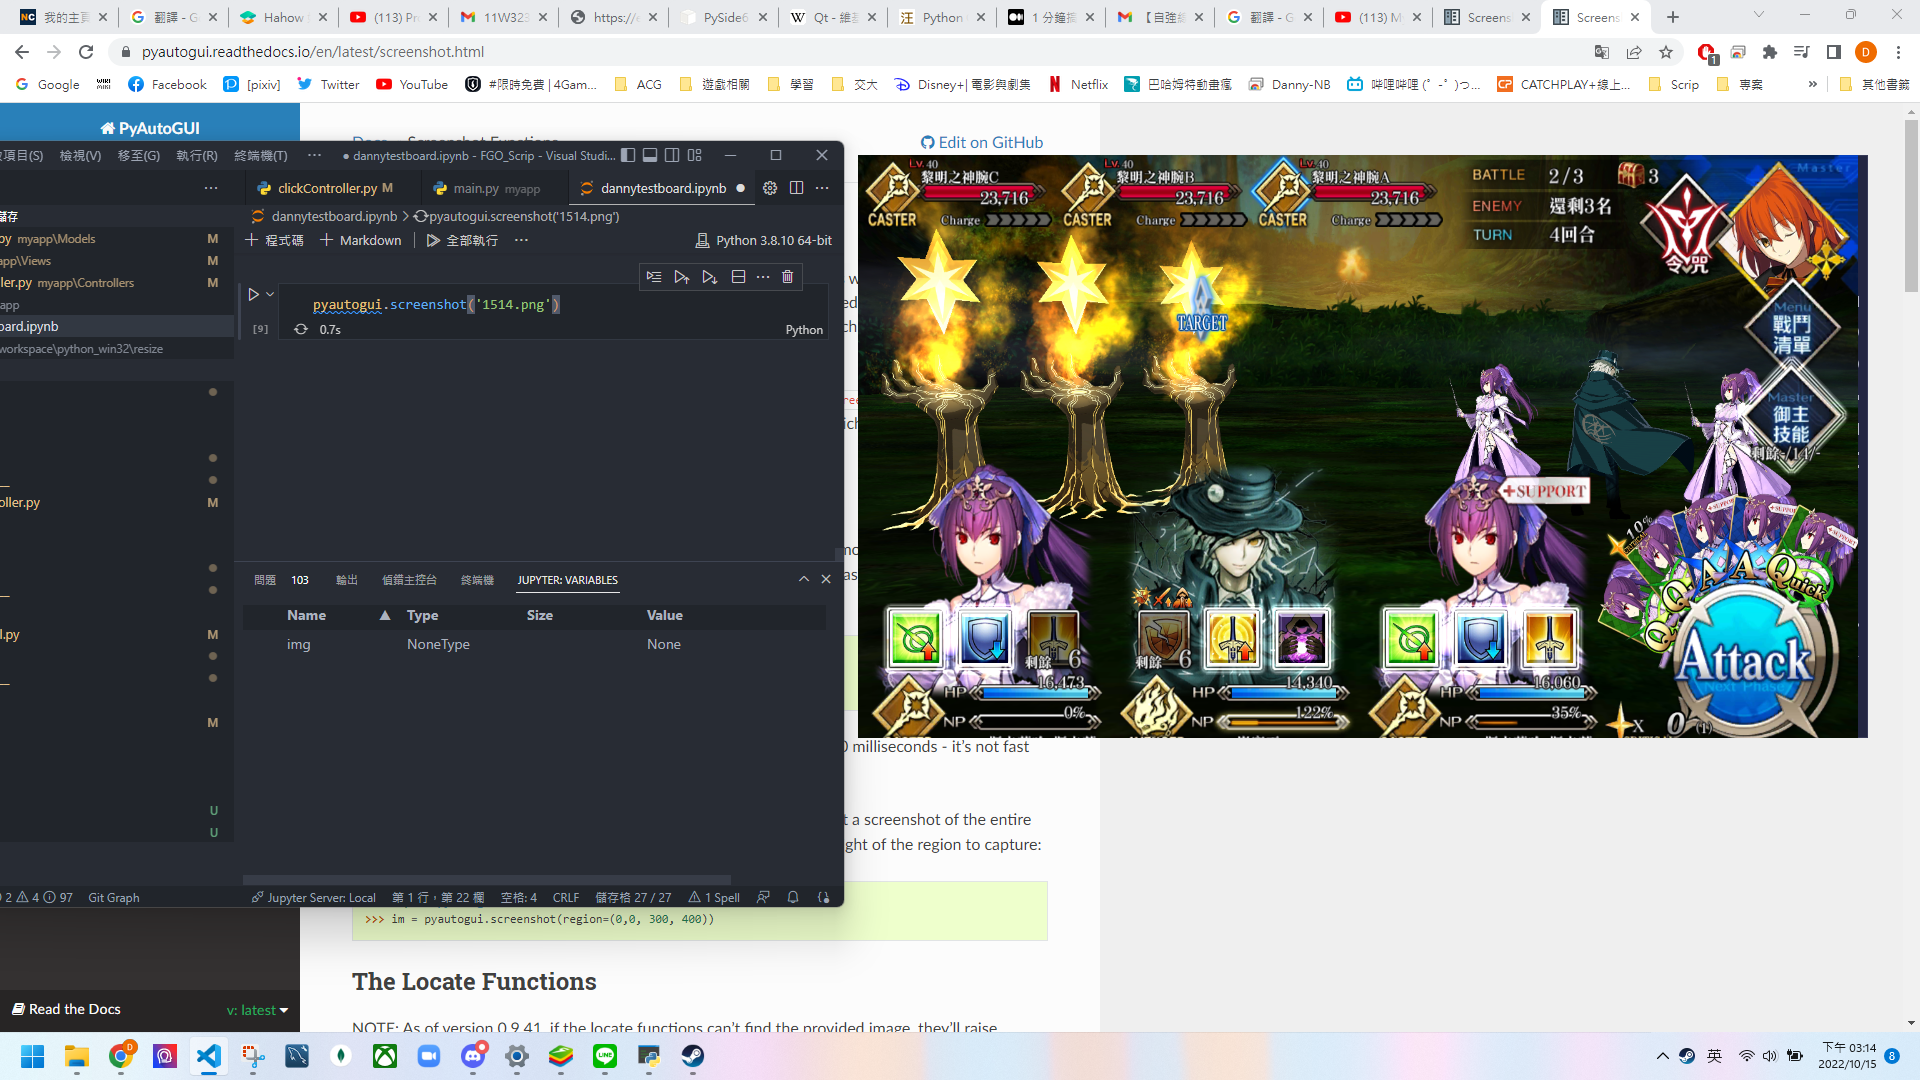

In [10]:
pyautogui.screenshot('1514.png')

In [26]:
from PIL import Image
import pytesseract

In [34]:
img = Image.open('Battle1-3.png')
img

In [35]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
img = Image.open('Battle1-3.png')
text = pytesseract.image_to_string(img, lang='eng')
print(text)

BATTLE (1/3



In [40]:
import win32api

In [42]:
win32api.GetCursorPos()

(465, 607)

In [46]:
win32gui.MoveWindow(3738078, 0, 0, 1000, 600, True)

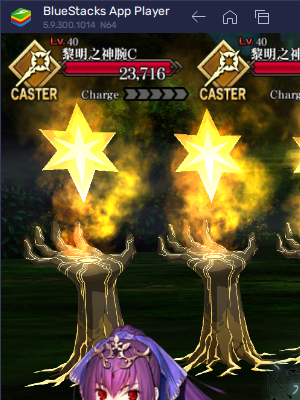

In [48]:

im = pyautogui.screenshot(region=(0,0, 300, 400))
im

In [88]:
#2034782  #265476
win32gui.MoveWindow(2295672, 10, 10, 100, 60, True)
win32gui.GetWindowRect(2295672)

(10, 10, 110, 70)

In [54]:
win32gui.GetWindowRect(2295672)

500

In [61]:
win32api.GetCursorPos()[0] - win32gui.GetWindowRect(2295672)[0]

49

In [69]:
win32gui.MoveWindow(459006, 50, 50, 1000, 600, True)

In [76]:
window = pyautogui.getWindowsWithTitle('BlueStacks App Player')


AttributeError: 'list' object has no attribute 'pyautogui'

In [135]:
win = win32gui.GetWindowRect(854362)
win

(647, 371, 1644, 932)

In [136]:
x_long = win[2]-win[0]
y_long = win[3]-win[1]
print(x_long, y_long)

997 561


In [140]:
int(10.8)

10

In [138]:
win32api.MAKELONG(10, 10)

TypeError: integer argument expected, got float

In [52]:
import os
list = os.listdir(r'.\myapp\history')
list

['123.json', 'test.json']

In [55]:
list[0].rstrip('.json')

'123'

In [1]:
a = list()
a[0] = 0

IndexError: list assignment index out of range

In [9]:
import time
import win32api, win32gui, win32con
def doDrag(position1, position2):
    x1, x2 = position1[0], position2[0]
    y1, y2 = position1[1], position2[1]
    hwnd = 985088
    long_position1 = win32api.MAKELONG(int(x1), int(y1)) 
    long_position2 = win32api.MAKELONG(int(x2), int(y2)) 

    win32gui.PostMessage(hwnd, win32con.WM_LBUTTONDOWN, win32con.MK_LBUTTON, long_position1)
    time.sleep(1)
    win32gui.PostMessage(hwnd, win32con.WM_LBUTTONUP, win32con.MK_LBUTTON, long_position2)

time.sleep(5)
p1 = [500, 200]
p2 = [500, 400]
doDrag(p2, p1)

In [13]:
import pyautogui

In [11]:
time.sleep(5)
long_position1 = win32api.MAKELONG(500, 300) 
win32gui.PostMessage(985088, win32con.WM_MOUSEWHEEL, -240, long_position1)

In [16]:
def doClick(position):
    x = position[0]
    y = position[1]
    hwnd = 985088
    long_position = win32api.MAKELONG(int(x), int(y)) 
    win32gui.PostMessage(hwnd, win32con.WM_LBUTTONDOWN, win32con.MK_LBUTTON, long_position)
    time.sleep(0.5)
    win32gui.PostMessage(hwnd, win32con.WM_LBUTTONUP, win32con.MK_LBUTTON, long_position)

time.sleep(5)
for i in range(5):
    go_down = pyautogui.locateOnScreen(r'go_down.png', confidence=0.95)
    x = pyautogui.center(go_down)[0] - win32gui.GetWindowRect(985088)[0]
    y = pyautogui.center(go_down)[1] - win32gui.GetWindowRect(985088)[1]
    position = [x, y]
    doClick(position)
    time.sleep(2)